<a href="https://colab.research.google.com/github/PrecyMaeMwanyungu/Supervised_machine_learning_and_customer_clustering_using_unsupervised_machine_learning_in_R/blob/master/Part_One.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Defining our question

> A Kenyan blogger started a cryptocurrency course which she gets to advertise on her blog. Over the years, she has been collecting data on the individuals who visit her blog and whether or not they click on the advertisement.

> Moving forward, she would like to know what audience to target in her advertisement. In order to do that she has approached our data science consultancy to give her solutions.


### a) Specifying the Question

> Performing indepth  exploratory data analysis to understand the people who visit her bog and their features in order to best highlight which individuals are most likely to click on her ads.
> Predicting whether or not an individual will click on ad.


### b) Defining the Metric for Success

* Effectively cleaning our dataset.
* Performing extensive exploratory data analysis.
* Highlighting the individuals most likely to click on the advertisements.


### c) Understanding the context

> Cryptocurrency is slowly gaining popularity around the world and the need to educate people on this form of money has been on the rise. Many still do not have a clear picture of what cryptocurrency is yet according to the Block-chain Association of Kenya, the total number of bitcoin transactions in Kenya are estimated to be worth over 1.5 million dollars.

> Our research topic is therefore, important as it helps us understand which group in the population in general is interested in cryptocurrency.

([Source](https://www.bbc.com/news/business-47307575))

### d) Recording the Experimental Design

1) Business Understanding: Understanding the business problem.

2) Reading the data: Getting access to our data and loading it using R-Studio.

3) Checking our data: Understanding our variables and the data types of our data.

4) Data cleaning: Checking for any missing values, duplicates, outliers and solving them.

5) EDA: Visualizing our data using univariate, bivariate and multivariate analysis.

6) Implementing the solution: Using the exploratory data analysis give appropriate solutions to the research problem and predicting whether or not a person will click on ad using supervised learning.

7) Conclusion: Recommend the individuals most likely to click on ad.




## PART 1 : Reading our dataset

In [1]:
# Load the dataset
df<- read.csv('advertising.csv', header = TRUE)

In [2]:
# Read the top of our dataset
head(df)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
,<dbl>,<int>,<dbl>,<dbl>,<fct>,<fct>,<int>,<fct>,<fct>,<int>
1,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
2,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
3,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
4,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
5,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
6,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [3]:
# Read the bottom of our dataset
tail(df)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
,<dbl>,<int>,<dbl>,<dbl>,<fct>,<fct>,<int>,<fct>,<fct>,<int>
995,43.70,28,63126.96,173.01,Front-line bifurcated ability,Nicholasland,0,Mayotte,2016-04-04 03:57:48,1
996,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
997,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
998,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
999,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
1000,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


In [4]:
# To take a look at the numeric and non numeric characters in our dataset.
str(df)

'data.frame':	1000 obs. of  10 variables:
 $ Daily.Time.Spent.on.Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Area.Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily.Internet.Usage    : num  256 194 236 246 226 ...
 $ Ad.Topic.Line           : Factor w/ 1000 levels "Adaptive 24hour Graphic Interface",..: 92 465 567 904 767 806 223 724 108 455 ...
 $ City                    : Factor w/ 969 levels "Adamsbury","Adamside",..: 962 904 112 940 806 283 47 672 885 713 ...
 $ Male                    : int  0 1 0 1 0 1 0 1 1 1 ...
 $ Country                 : Factor w/ 237 levels "Afghanistan",..: 216 148 185 104 97 159 146 13 83 79 ...
 $ Timestamp               : Factor w/ 1000 levels "2016-01-01 02:52:10",..: 440 475 368 57 768 690 131 334 549 942 ...
 $ Clicked.on.Ad           : int  0 0 0 0 0 0 0 1 0 0 ...


>  Our first four columns are numeric while the rest are categorical. Our dataset has 10 columns (variables) 1000 entries (rows)

## PART 2: Data Cleaning

### a) Missing Values

In [5]:
# Checking for missing values in our dataset.
# Columns with missing values
colSums(is.na(df))

Daily.Time.Spent.on.Site                      Age              Area.Income 
                       0                        0                        0 
    Daily.Internet.Usage            Ad.Topic.Line                     City 
                       0                        0                        0 
                    Male                  Country                Timestamp 
                       0                        0                        0 
           Clicked.on.Ad 
                       0

In [6]:
# The sum total missing values in the dataset
# Sum of missing
sum(is.na(df))

[1] 0

> There are no missing values in our dataset.



### b) Duplicates

In [7]:
# To show our duplicated rows

duplicated_rows <- df[duplicated(df),]
duplicated_rows

Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
<dbl>,<int>,<dbl>,<dbl>,<fct>,<fct>,<int>,<fct>,<fct>,<int>


> There are no duplicated rows.

### c) Outliers


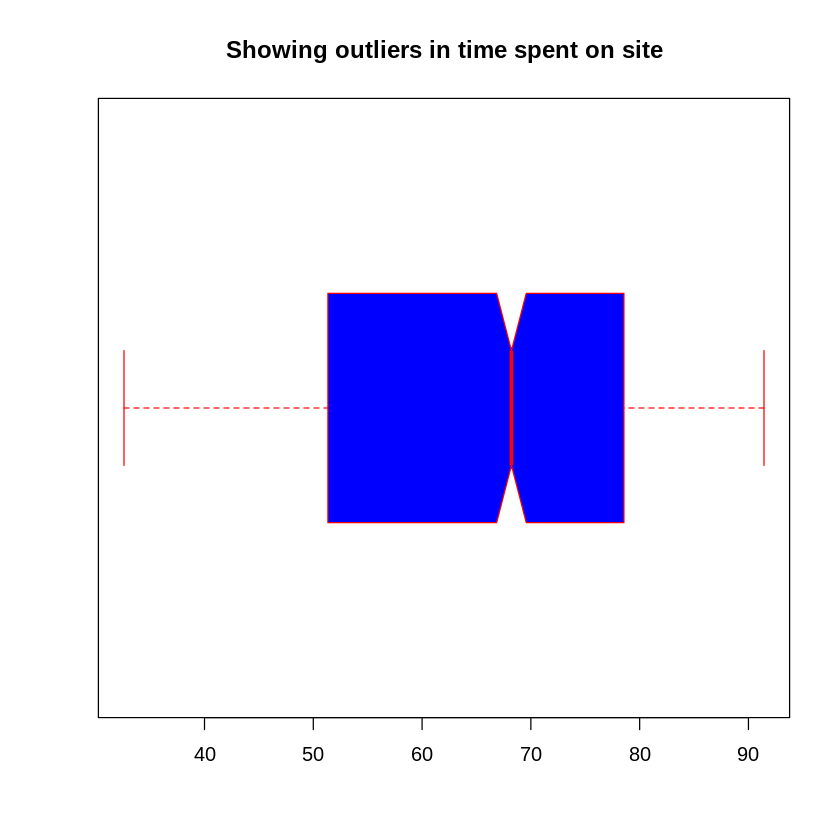

In [8]:
# Showing outlier using box plots
# A box plot showing outlier in the time spent on site column
boxplot(df$Daily.Time.Spent.on.Site,
main = "Showing outliers in time spent on site",
col = "blue",
border = "red",
horizontal = TRUE,
notch = TRUE)


> There are no outliers in time spent on site.


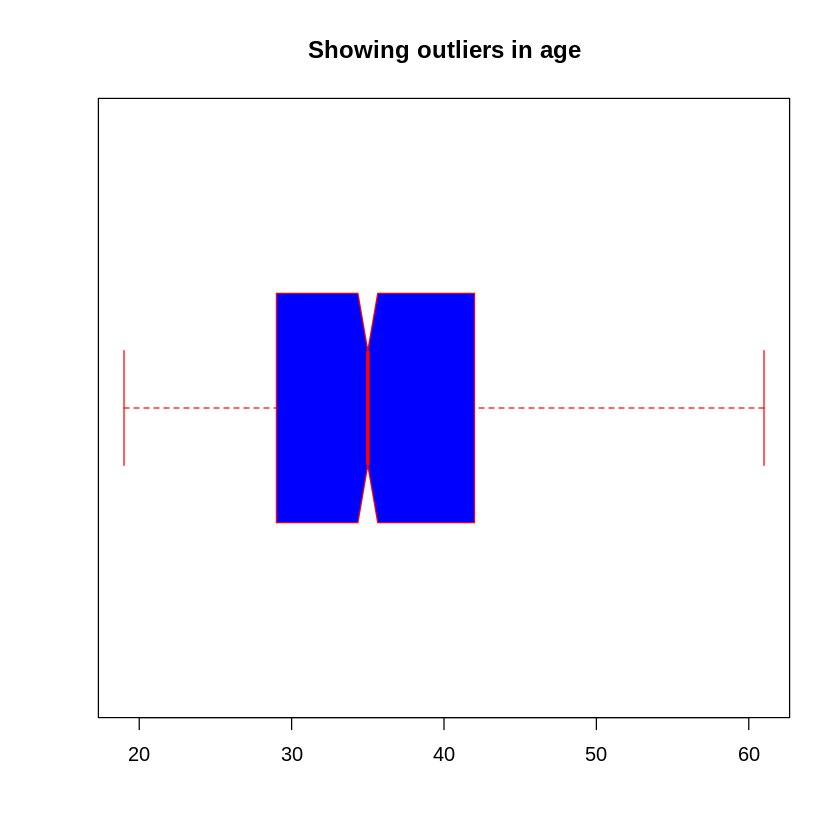

In [9]:
# A box plot showing outlier in the age column
boxplot(df$Age,
main = "Showing outliers in age",
col = "blue",
border = "red",
horizontal = TRUE,
notch = TRUE)

> There are no outliers in age 

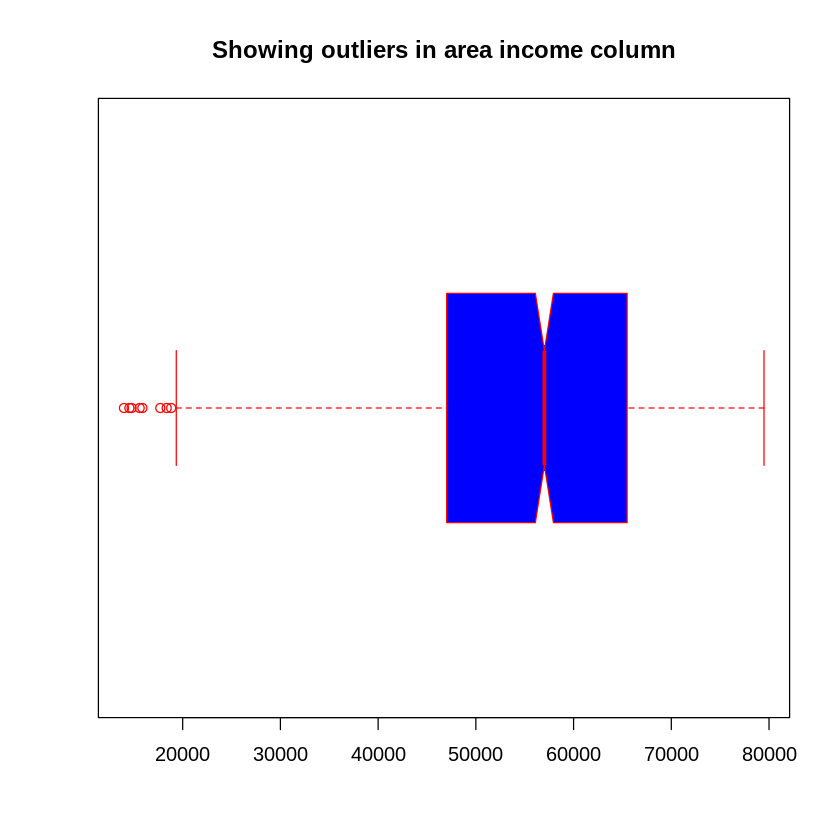

In [10]:
# A box plot showing outlier in the area income column
boxplot(df$Area.Income,
main = "Showing outliers in area income column",
col = "blue",
border = "red",
horizontal = TRUE,
notch = TRUE)


> There are a few outliers below the income 20,000 dollars. We will not remove these outliers because they are reasonable. 



## PART 3 : Univariate Analysis

In [11]:
# Loading prerequisites 
install.packages("ggplot2",dependencies=TRUE)
install.packages("ggpubr",dependencies=TRUE)
# libraries
library(ggplot2)
library(ggpubr)
theme_set(theme_pubr())

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘zoo’, ‘matrixStats’, ‘RcppArmadillo’, ‘e1071’, ‘fontBitstreamVera’, ‘fontLiberation’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘fastmap’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘data.table’, ‘htmlTable’, ‘viridis’, ‘sp’, ‘mvtnorm’, ‘TH.data’, ‘sandwich’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘classInt’, ‘units’, ‘diffobj’, ‘fontquiver’, ‘freetypeharfbuzz’, ‘shiny’, ‘ggplot2movies’, ‘hexbin’, ‘Hmisc’, ‘mapproj’, ‘maps’, ‘maptools’, ‘multcomp’, ‘profvis’, ‘quantreg’, ‘rgeos’, ‘sf’, ‘vdiffr’


Warning message in install.packages("ggplot2", dependencies = TRUE):
“installation of package ‘units’ had non-zero exit status”
Warning message in install.packages("ggplot2", dependencies = TRUE):
“installation of package ‘rgeos’ had non-zero exit status”
Warning message in install.packages("ggplot2", dependencies = TRUE):
“installation of package ‘sf’ had non-z

### a) Statistical Summary

In [12]:
# Viewing the statistical summary of our dataset
summary(df)

 Daily.Time.Spent.on.Site      Age         Area.Income    Daily.Internet.Usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       
                                                                              
                                 Ad.Topic.Line              City    
 Adaptive 24hour Graphic Interface      :  1   Lisamouth      :  3  
 Adaptive asynchronous attitude         :  1   Williamsport   :  3  
 Adaptive context-sensitive application :  1   Benjaminchester:  2  
 Adaptive contextually-based methodology:  1   East John      :  2  
 Adaptive demand-driven

*  The average age is 36, the average income is 55,000, the average time spent is 65 and the average internet usage is 180 daily.
*  The minimum time spent is 32, youngest person in the site is 19 years old, the smallest income is 13996.

### b) Variances and Standard Deviation
* Variance is a way to measure how far a set of numbers is spread out.
* Standard Deviation is a number used to tell how measurements for a group are spread out from the mean. A low standard deviation means that most of the numbers are close to the average.

In [ ]:
# Variance and standard deviation
age = df$Age    # the age
var(age)        # apply the variance function
sd(age)         # apply the standard deviation function

>  Age has a standard deviation of 8(close to mean) and a variance of 77


In [13]:
# Variance and standard deviation
inc = df$Area.Income    # the Area income
var(inc)        # apply the variance function
sd(inc)         # apply the standard deviation function

[1] 179952406

[1] 13414.63

 >  Area income has a standard deviation of 13414 (far from mean) and a variance of 179,952,406


In [14]:
# Variance and standard deviation
time= df$Daily.Time.Spent.on.Site   # the time spent
var(time)        # apply the variance function
sd(time)         # apply the standard deviation function

[1] 251.3371

[1] 15.85361

> Daily time spent on site has a variance of 251 and a standard deviation of 15 which means most values are closer to the mean.

In [15]:
# Variance and standard deviation
int= df$Daily.Internet.Usage   # the internet usage
var(int)        # apply the variance function
sd(int)         # apply the standard deviation function

[1] 1927.415

[1] 43.90234


>  Daily internet usage has a variance of 1927 and a standard deviation of 43 which means that most values are fairly close to the mean.

### c) histogram


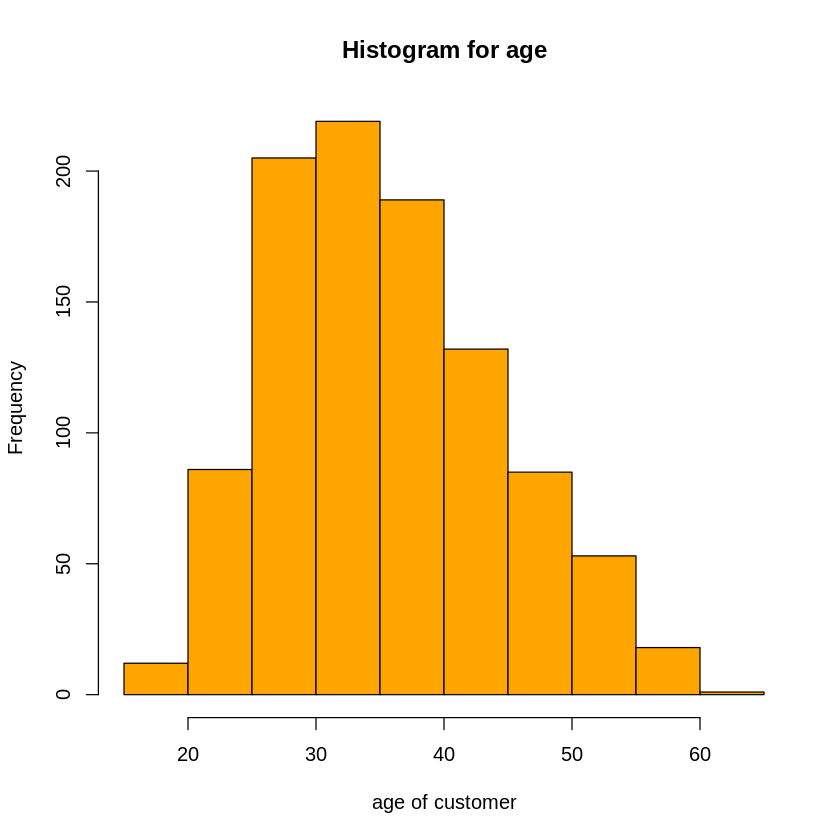

In [16]:
hist(df$Age ,
     col='orange',
     main='Histogram for age',
     xlab= 'age of customer')


>  The age variable is almost normally distributed


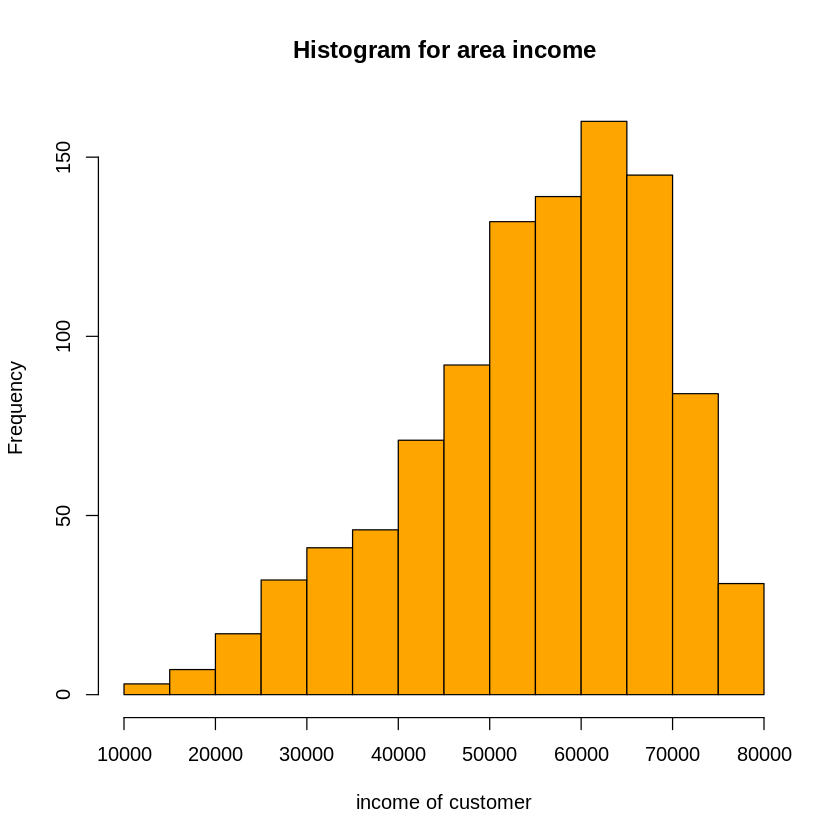

In [17]:
hist(df$Area.Income ,
     col='orange',
     main='Histogram for area income',
     xlab= 'income of customer')

>  The income of the customers is negatively skewed as the tail is on the left/ left skewed.


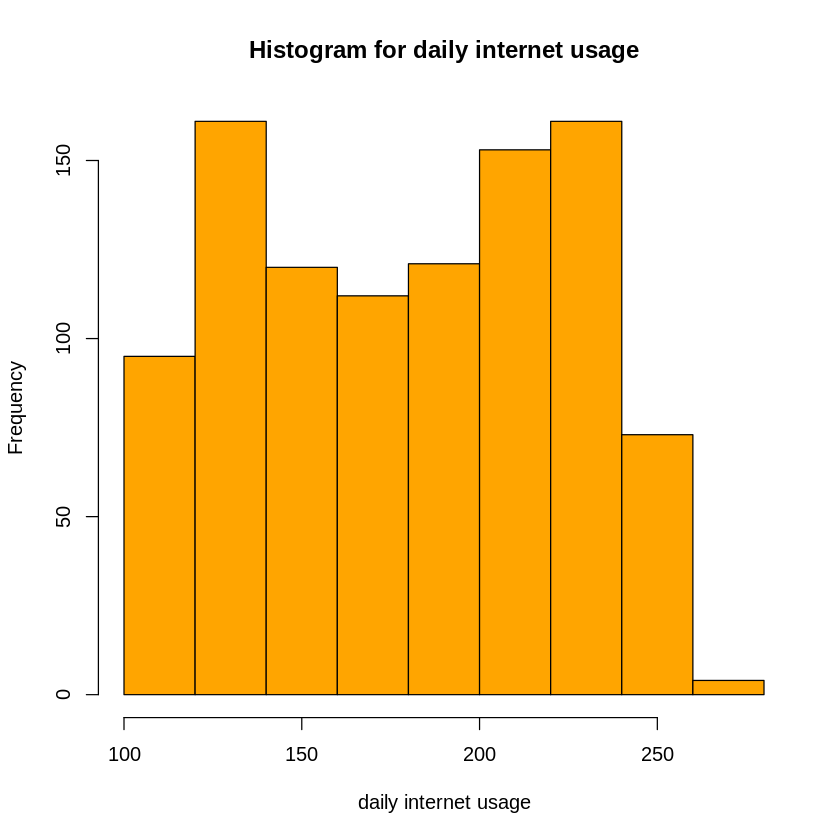

In [18]:
hist(df$Daily.Internet.Usage ,
     col='orange',
     main='Histogram for daily internet usage',
     xlab= 'daily internet usage')

>  Daily internet usage seems to be bi-modal (with two modes). It also appears to be normally distribution.


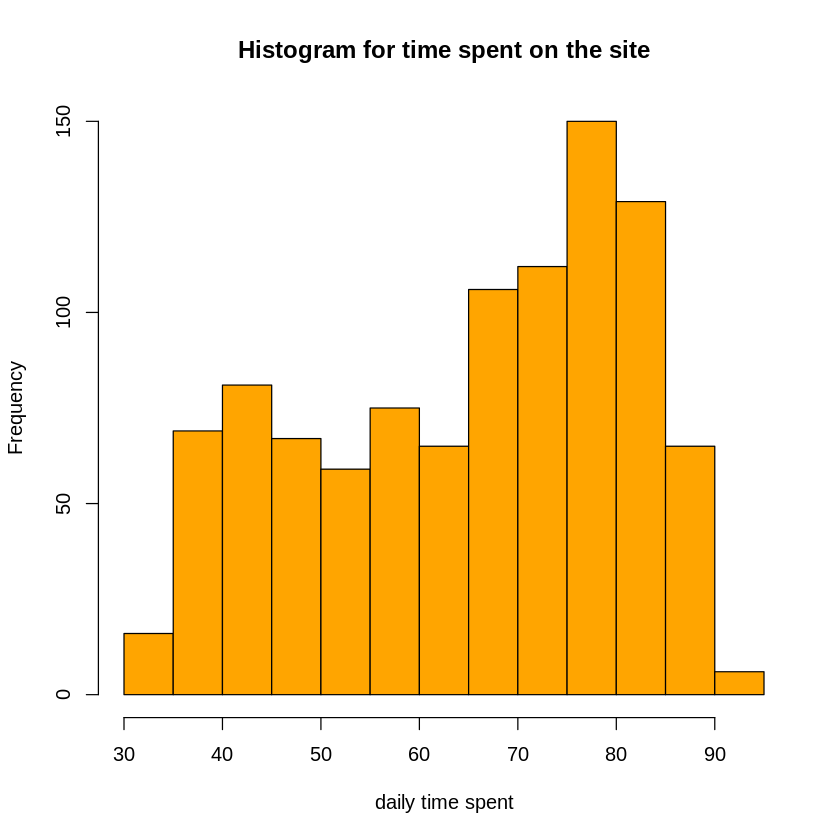

In [19]:
hist(df$Daily.Time.Spent.on.Site ,
     col='orange',
     main='Histogram for time spent on the site',
     xlab= 'daily time spent')

> The data on time spent on the site seems to be slightly negatively skewed.


## PART 4 : Bivariate Analysis


### a) Covariance


In [20]:
# Checking the relationship between age and likelihood to click on ad.
# Assigning the age column to the variable age
# ---
# 
age <- df$Age

# Assigning the clicked on ad column to the variable clicked on ad
# ---
# 
ad<- df$Clicked.on.Ad

# Using the cov() function to determine the covariance
# ---
#
cov(age, ad)

[1] 2.164665

> There is a positive relationship between age and whether or not a person will click on ad.


In [21]:
# Checking the relationship between time spent on site and likelihood to click on ad.
time <- df$Daily.Time.Spent.on.Site
cov(time, ad)

[1] -5.933143

>  There is a negative relationship between time spent on site and likelihood to click on ad.

In [22]:
# Checking the relationship between internet usage and likelihood to click on advert.
int <- df$Daily.Internet.Usage
cov(int, ad)

[1] -17.27409

>  There is a negative relationship between internet usage and likelihood of a person to click on ad.


In [23]:
# Checking the relationship between area income and whether or not a person will click on ad
inc <- df$Area.Income
cov(inc, ad)

[1] -3195.989

>  There is a negative relationship between area income and likelihood to click on ad


### b) Correlation


In [24]:
# Calculating correlation between age and click on ad
cor(age, ad)

[1] 0.4925313

> The relationship is moderately positive between the two.


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘bitops’, ‘foreach’, ‘gtools’, ‘gdata’, ‘caTools’, ‘TSP’, ‘qap’, ‘gclus’, ‘dendextend’, ‘gplots’, ‘registry’, ‘seriation’


Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus



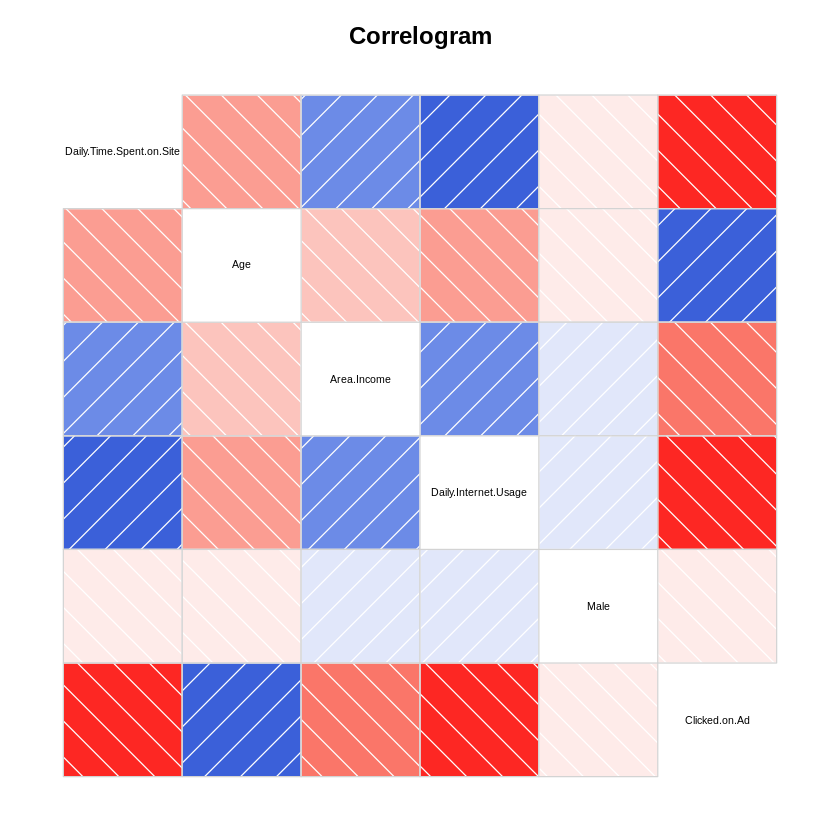

In [25]:
# Showing correlation across variables
install.packages("corrgram")
library(corrgram)

corrgram(df, order=NULL, panel=panel.shade, text.panel=panel.txt,
           main="Correlogram") 


* There is a positive correlation between daily internet usage and daily time spent on site. 
* There is also a positive relationship between income and daily internet usage.
* There is also a positive relationship between income and daily time spent on site.

In [27]:
# Converting the clicked on ad to categorical
df$Clicked.on.Ad <- as.factor(df$Clicked.on.Ad)

Warning message:
“geom_vline(): Ignoring `mapping` because `xintercept` was provided.”
Warning message:
“geom_vline(): Ignoring `data` because `xintercept` was provided.”


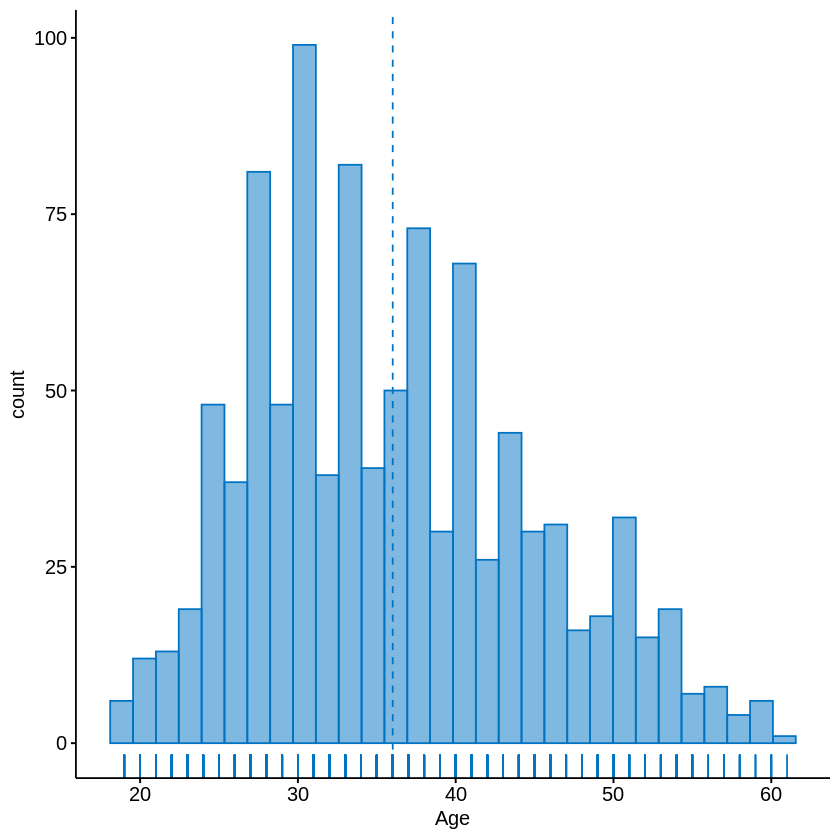

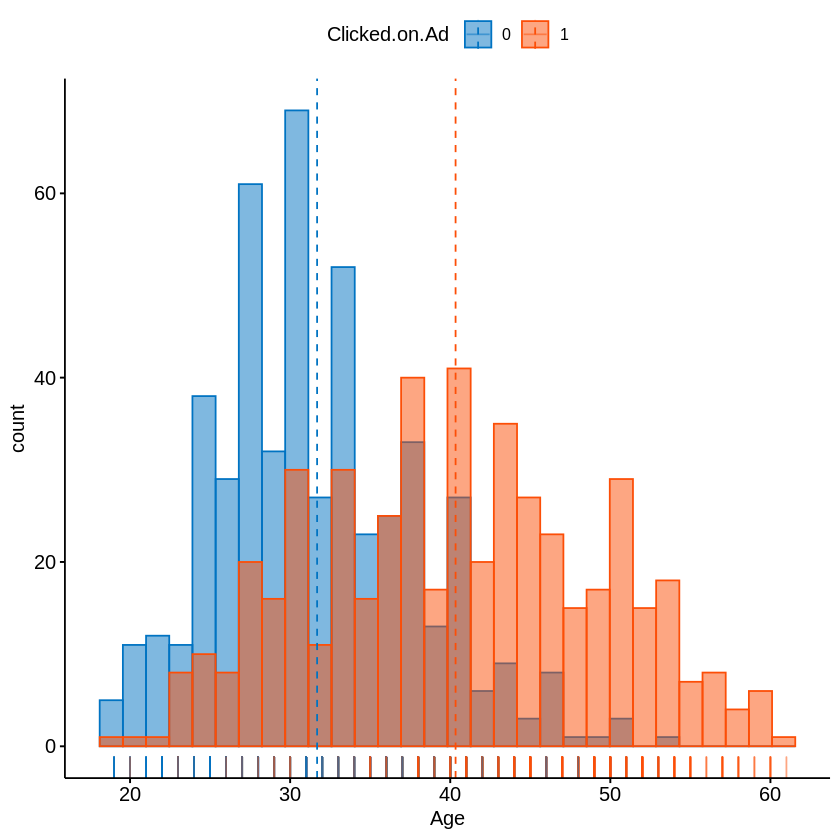

In [28]:
# Showing distribution of ages between clicked and not clicked ad
# Use a custom palette
library(ggpubr)
# Basic histogram plot with mean line and marginal rug
gghistogram(df, x = "Age", bins = 30, 
            fill = "#0073C2FF", color = "#0073C2FF",
            add = "mean", rug = TRUE)
     
# Change outline and fill colors by groups ("sex")
# Use a custom palette
gghistogram(df, x = "Age", bins = 30,
   add = "mean", rug = TRUE,
   color = "Clicked.on.Ad", fill = "Clicked.on.Ad",
   palette = c("#0073C2FF", "#FC4E07"))


>  People who clicked on ad are fairly distributed across the ages while those who do not click on ad are mostly under 35 years old.

Warning message:
“geom_vline(): Ignoring `mapping` because `xintercept` was provided.”
Warning message:
“geom_vline(): Ignoring `data` because `xintercept` was provided.”


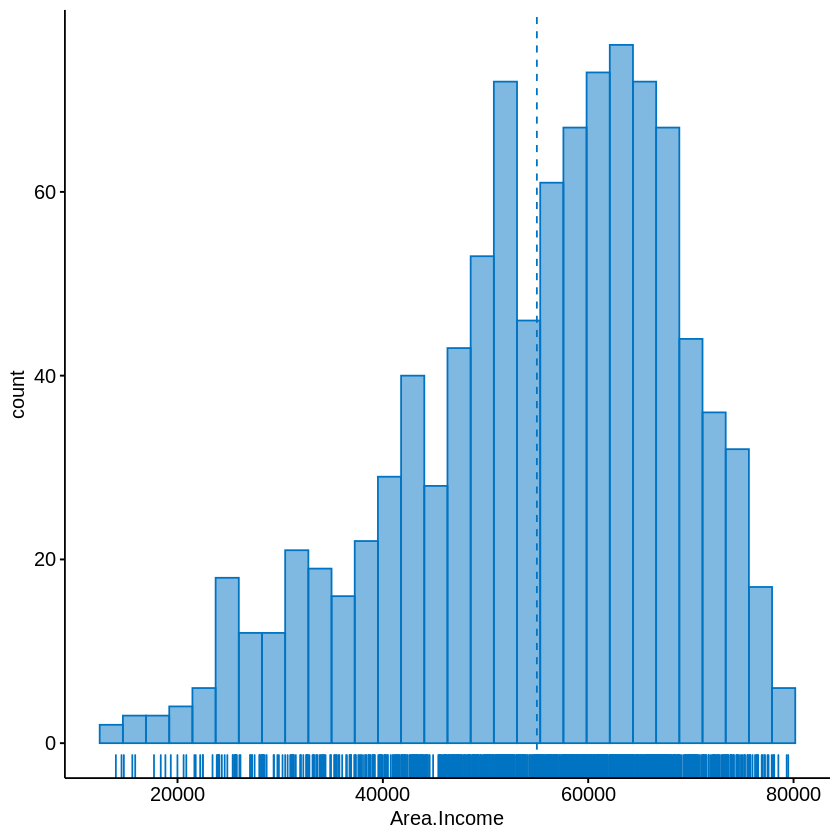

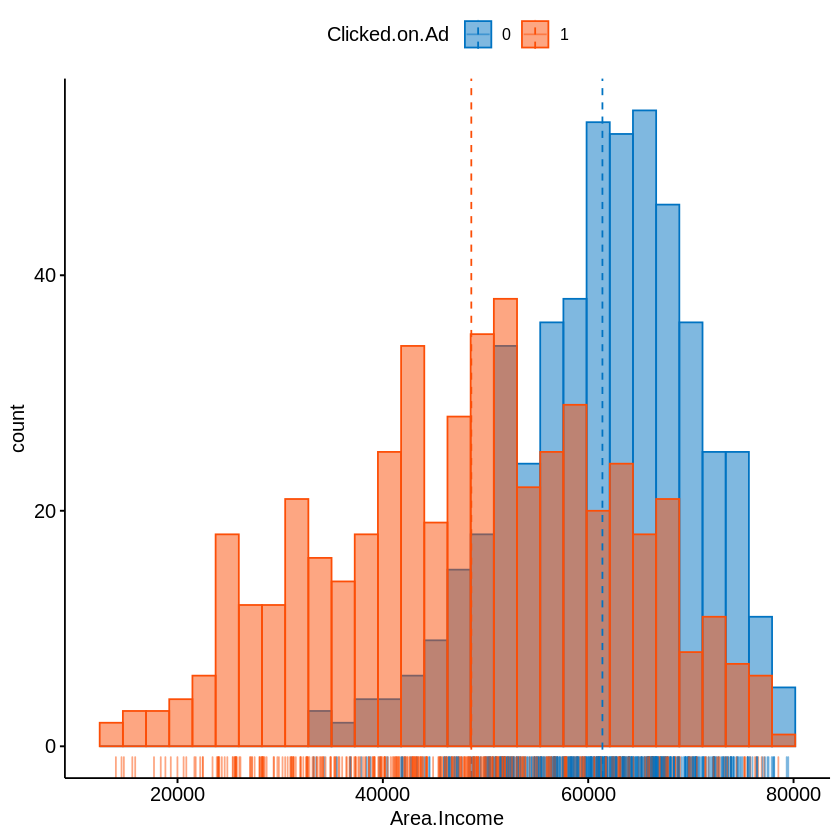

In [29]:
# Showing distribution of area income between clicked and not clicked ad
# Use a custom palette
library(ggpubr)
# Basic histogram plot with mean line and marginal rug
gghistogram(df, x = "Area.Income", bins = 30, 
            fill = "#0073C2FF", color = "#0073C2FF",
            add = "mean", rug = TRUE)
     
# Change outline and fill colors by groups ("sex")
# Use a custom palette
gghistogram(df, x = "Area.Income", bins = 30,
   add = "mean", rug = TRUE,
   color = "Clicked.on.Ad", fill = "Clicked.on.Ad",
   palette = c("#0073C2FF", "#FC4E07"))

>  The individuals who clicked on the ad are fairly distributed across area incomes but those with incomes greater than 60,000 were more likely not to click on ad.


Warning message:
“geom_vline(): Ignoring `mapping` because `xintercept` was provided.”
Warning message:
“geom_vline(): Ignoring `data` because `xintercept` was provided.”


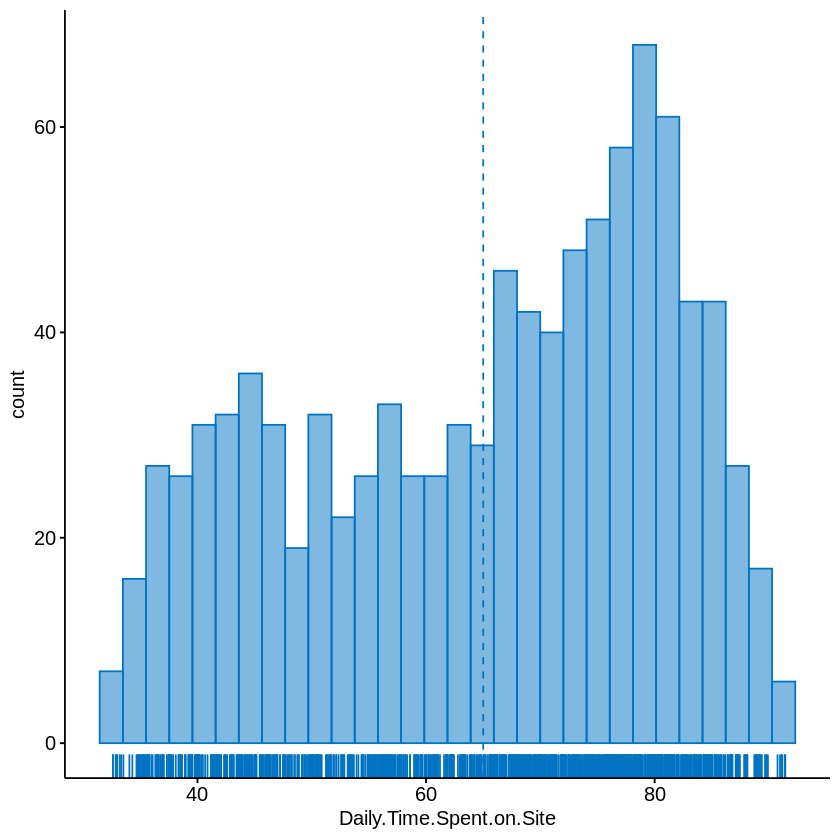

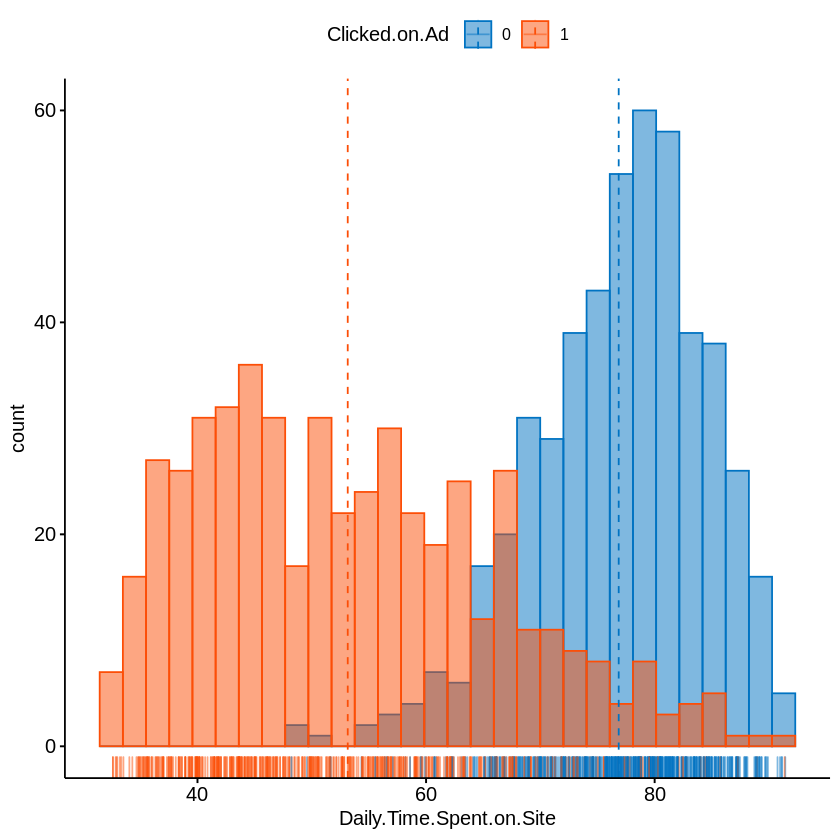

In [30]:
# Showing distribution of daily time spent on site between clicked and not clicked ad
# Use a custom palette
library(ggpubr)
# Basic histogram plot with mean line and marginal rug
gghistogram(df, x = "Daily.Time.Spent.on.Site", bins = 30, 
            fill = "#0073C2FF", color = "#0073C2FF",
            add = "mean", rug = TRUE)
     
# Change outline and fill colors by groups ("sex")
# Use a custom palette
gghistogram(df, x = "Daily.Time.Spent.on.Site", bins = 30,
   add = "mean", rug = TRUE,
   color = "Clicked.on.Ad", fill = "Clicked.on.Ad",
   palette = c("#0073C2FF", "#FC4E07"))

> People spending less than 60 minutes on site are more likely to click on ad.


Warning message:
“geom_vline(): Ignoring `mapping` because `xintercept` was provided.”
Warning message:
“geom_vline(): Ignoring `data` because `xintercept` was provided.”


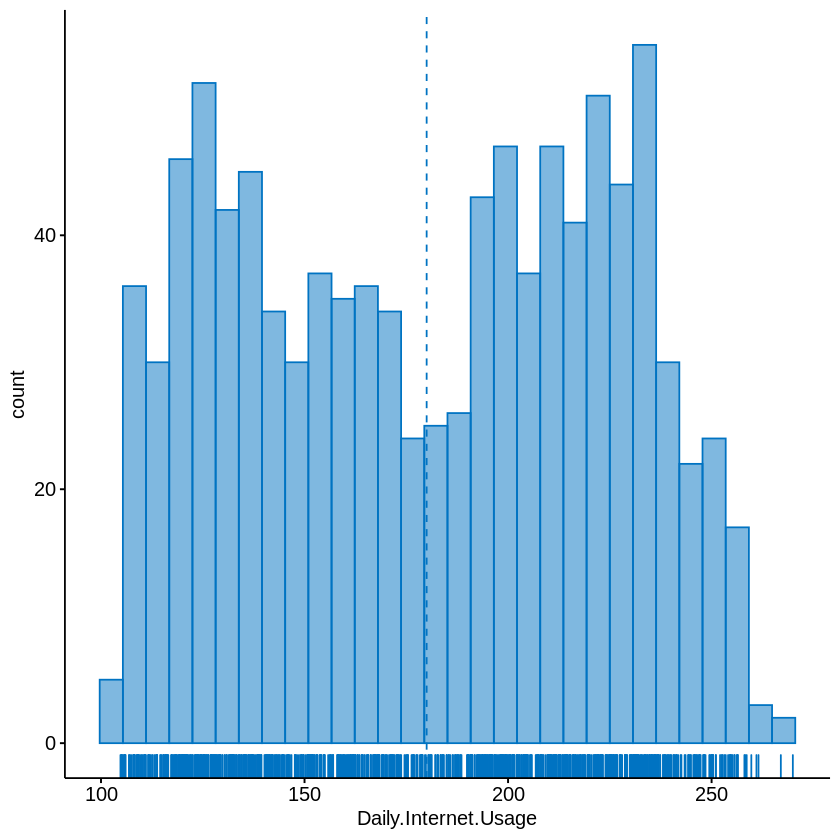

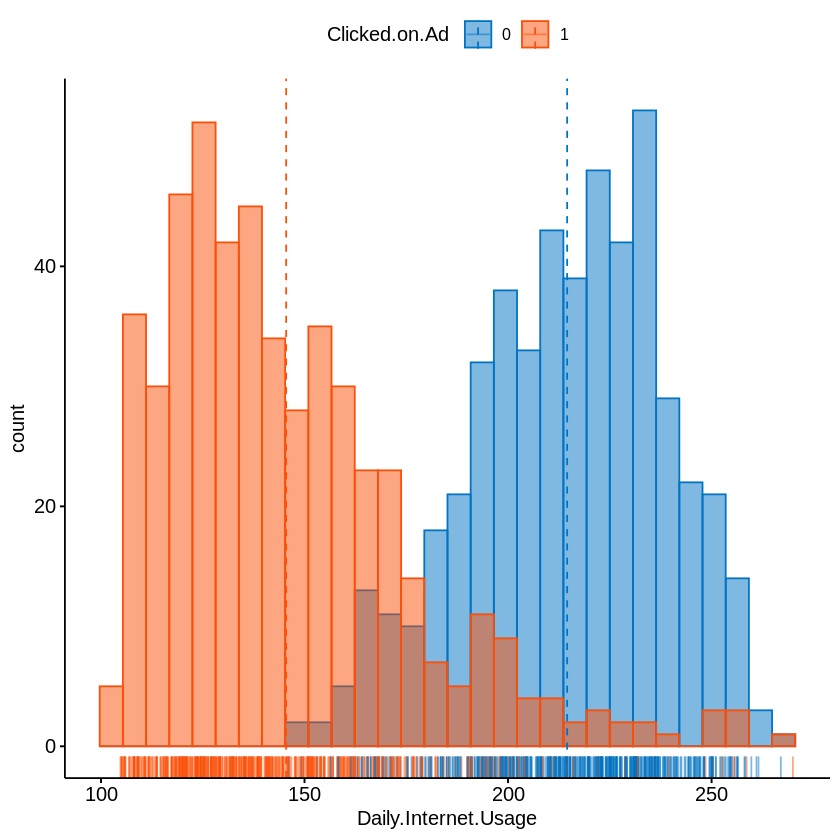

In [31]:
#Showing distribution of daily internet usage between clicked and not clicked ad
# Use a custom palette
library(ggpubr)
# Basic histogram plot with mean line and marginal rug
gghistogram(df, x = "Daily.Internet.Usage", bins = 30, 
            fill = "#0073C2FF", color = "#0073C2FF",
            add = "mean", rug = TRUE)
     
# Change outline and fill colors by groups ("sex")
# Use a custom palette
gghistogram(df, x = "Daily.Internet.Usage", bins = 30,
   add = "mean", rug = TRUE,
   color = "Clicked.on.Ad", fill = "Clicked.on.Ad",
   palette = c("#0073C2FF", "#FC4E07"))

> Those with high and low internet usage had similar chances to click on advetisement.


## PART 4: Multivariate analysis


### Pairplots


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“dependencies ‘graph’, ‘Rgraphviz’ are not available”
also installing the dependencies ‘tmvnsim’, ‘pbivnorm’, ‘numDeriv’, ‘mnormt’, ‘psychTools’, ‘GPArotation’, ‘lavaan’, ‘Rcsdp’



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




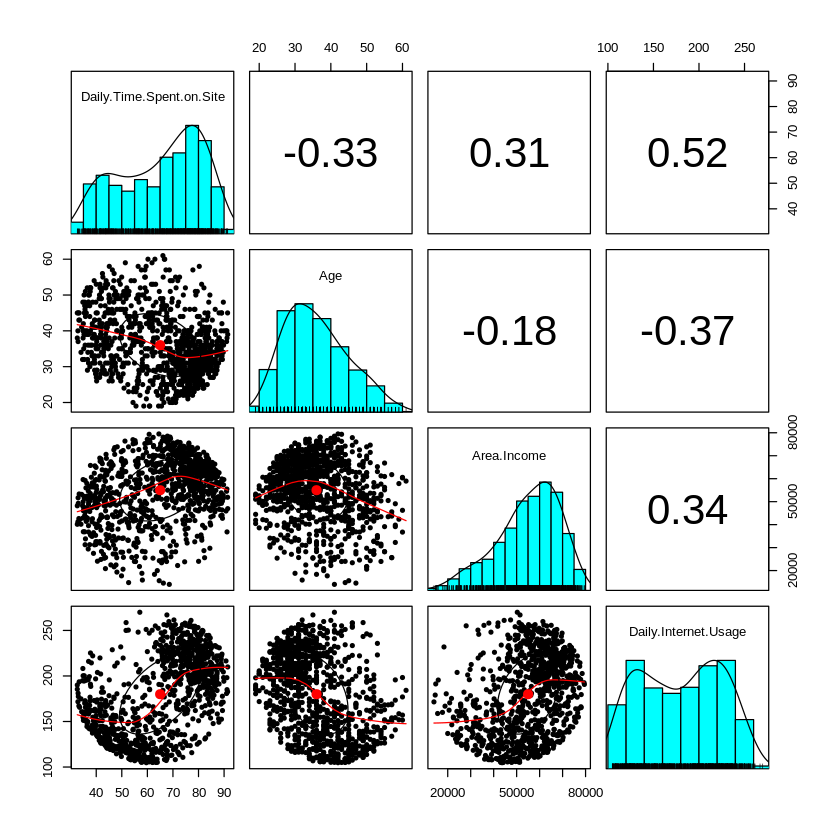

In [32]:
# Plotting our pairplots
install.packages("psych",dependencies=TRUE)
#
library(psych)
pairs.panels(df[,c(1:4)])

> There is no much relationship between our countinuous variables.


## Part 5: Modelling


### Base model : Decision trees


In [79]:
# Selecting our variables
df <- df[, c(1, 2, 3, 4,6, 7, 8,10)]
head(df)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,City,Male,Country,Clicked.on.Ad
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<fct>
1,68.95,35,61833.90,256.09,962,0,216,0
2,80.23,31,68441.85,193.77,904,1,148,0
3,69.47,26,59785.94,236.50,112,0,185,0
4,74.15,29,54806.18,245.89,940,1,104,0
5,68.37,35,73889.99,225.58,806,0,97,0
6,59.99,23,59761.56,226.74,283,1,159,0


In [89]:
# Installing the package
install.packages("ISLR",dependencies=TRUE)
library(ISLR)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [92]:
# Train test split your data
intrain <- createDataPartition(y = df$Clicked.on.Ad, p= 0.7, list = FALSE)
data_train <- df[intrain,]
data_test<- df[-intrain,]
dim(data_train)

[1] 700   8

Our data is well split

In [94]:
# installing rpart.plot for our decision tree
install.packages("rpart.plot", dependancies= TRUE)	
library(rpart.plot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: rpart



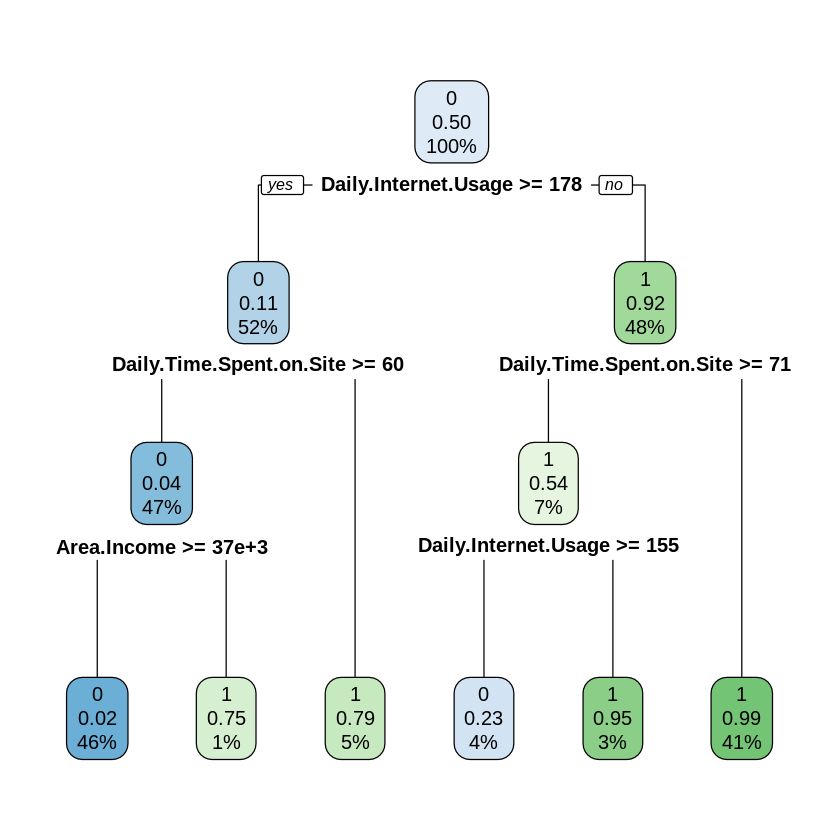

In [95]:
# Plotting our decision tree
library(rpart)
library(rpart.plot)
fit <- rpart(Clicked.on.Ad~., data = data_train, method = 'class')
rpart.plot(fit, extra = 106)

>  From the top, if the daily internet usage is greater than 178 and the daily time spent on the site is greater than 71, then there will be 99% chance that the person will click on the ad.

In [97]:
# Fitting our model
predict_unseen <-predict(fit, data_test, type = 'class')
# Predicting clicked on ad
table_mat <- table(data_test$Clicked.on.Ad, predict_unseen)
table_mat

   predict_unseen
      0   1
  0 140  10
  1   8 142

> From our predictions, there will be 152 clicks on ad and 148 misses

In [100]:
# Accuracy for our test
# Calculating our accuracy
accuracy_Test <- sum(diag(table_mat)) / sum(table_mat)
# Printing our accuracy
print(paste('Accuracy for test', accuracy_Test))


[1] "Accuracy for test 0.94"


> Our base model has 94% accuracy, therefore we would want our actual model to exceed that accuracy

### SVM


In [78]:
# Load library that contains the SVM function
install.packages("e1071",dependencies=TRUE)
install.packages('caret',dependencies = TRUE)
#
library(caret)
library(e1071)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“dependency ‘superpc’ is not available”
also installing the dependencies ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘SQUAREM’, ‘R.cache’, ‘profileModel’, ‘plotrix’, ‘lava’, ‘miniUI’, ‘styler’, ‘labelled’, ‘libcoin’, ‘gower’, ‘timeDate’, ‘brglm’, ‘qvcalc’, ‘plotmo’, ‘TeachingDemos’, ‘prodlim’, ‘combinat’, ‘questionr’, ‘ROCR’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘ISwR’, ‘corpcor’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’, ‘BradleyTerry2’, ‘earth’, ‘fastICA’, ‘gam’, ‘ipred’, ‘kernlab’, ‘klaR’, ‘ellipse’, ‘mda’, ‘MLmetrics’, ‘party’, ‘pls’, ‘proxy’, ‘RANN’, ‘spls’, ‘subselect’, ‘pamr’, ‘Cubist’


Loading required package: lattice


Attaching package: ‘lattice’


The following object is masked from ‘package:corrgram’:

    panel.fill




In [80]:
# Splitting our data to train and test
intrain <- createDataPartition(y = df$Clicked.on.Ad, p= 0.7, list = FALSE)
training <- df[intrain,]
testing <- df[-intrain,]

In [81]:
# We check the dimensions of out training dataframe and testing dataframe
# 
dim(training); 
dim(testing);

[1] 700   8

[1] 300   8

> Our data is well split to train and test

In [82]:
# The following code will convert the training data dependent variable to a factor variable.
training[["Clicked.on.Ad"]] = factor(training[["Clicked.on.Ad"]])


In [83]:
# We are using setting number =10 and repeats =3
# ---
# 
trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3)

svm_Linear <- train(Clicked.on.Ad ~., data = training, method = "svmLinear",
trControl=trctrl,
preProcess = c("center", "scale"),
tuneLength = 10)

In [84]:
# We can then check the reult of our train() model as shown below
# 
svm_Linear

Support Vector Machines with Linear Kernel 

700 samples
  7 predictor
  2 classes: '0', '1' 

Pre-processing: centered (7), scaled (7) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 630, 630, 630, 630, 630, 630, ... 
Resampling results:

  Accuracy   Kappa    
  0.9657143  0.9314286

Tuning parameter 'C' was held constant at a value of 1

> Our SVM model has given us a very accurate model without much overfitting. A model with 96% accuracy with the linear kernel.

In [85]:
# Use the predict() method for predicting results. 
test_pred <- predict(svm_Linear, newdata = testing)
test_pred

[1] 0 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0
 [38] 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1
 [75] 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0
[112] 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1
[149] 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 1 1
[186] 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0
[223] 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0
[260] 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 1
[297] 1 1 1 1
Levels: 0 1

The above are our predictions

In [86]:
# Using a confusion matrix
confusionMatrix(table(test_pred, testing$Clicked.on.Ad))


Confusion Matrix and Statistics

         
test_pred   0   1
        0 149   6
        1   1 144
                                          
               Accuracy : 0.9767          
                 95% CI : (0.9525, 0.9906)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9533          
                                          
 Mcnemar's Test P-Value : 0.1306          
                                          
            Sensitivity : 0.9933          
            Specificity : 0.9600          
         Pos Pred Value : 0.9613          
         Neg Pred Value : 0.9931          
             Prevalence : 0.5000          
         Detection Rate : 0.4967          
   Detection Prevalence : 0.5167          
      Balanced Accuracy : 0.9767          
                                          
       'Positive' Class : 0               
                                          

> Our model made 293 correct predictions and only seven false predictions


## Part 6: Conclusions and Recommendations

* Persons over the age of 40 are more likely to click on the ad compared to the younger counterparts. This could be because they have enough finances to take part in a cryptocurrency transaction.
* Persons who spend less time on the site are most likely to click on the ad therefore we would advise our client to make it interesting to capture someones attention in a short time. The people who spend more time on the site probably have other interests other than cryptocurrency. 
* People who click on the ad are fairly distributed across area income levels which means that the course can attract students across income levels.
* We were able to make correct predictions on whether a person will click on an ad using SVM 